In [2]:
# Import all the Libraries required for the Data Analysis

import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


0.41104424795099814
[0.01289878]


(0.0, 0.8953)

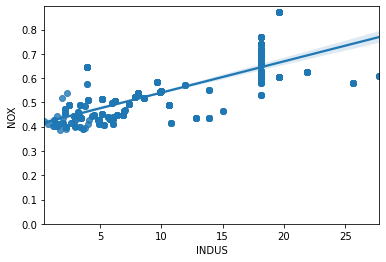

In [19]:
# Fetching the Data and converting the Data to a Dataframe for analysis purpose.
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

X = boston_df[['INDUS']]
Y = boston_df['NOX']

lm = LinearRegression()

lm.fit(X, Y)

print(lm.intercept_)
print(lm.coef_)

Y_hat = lm.predict(X)

Y_hat

sns.regplot(x = "INDUS", y = "NOX", data = boston_df)
plt.ylim(0,)




In [6]:
# Describe the info of the Dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
# Provide the Summary Statistics of the Dataset

boston_df.describe(include = "all")

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
# List the columns of the Dataset

boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Boxplot'),
 Text(0.5, 1.0, 'Boxplot for Median value of owner-occupied homes')]

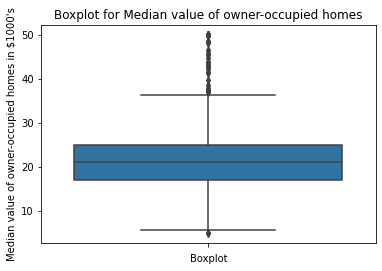

In [120]:
# Display a Boxplot for the "Median value of owner-occupied homes in $1000's" column.

box = sns.boxplot(y = 'MEDV', data = boston_df)
box.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

EXPLANATION - The Boxplot shown here corresponds to Median value of owner-occupied homes in $1000's and we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 21 or 22.

[Text(0, 0.5, 'Frequency for Charles river variable'),
 Text(0.5, 0, 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0.5, 1.0, 'Histogram for the Charles river variable')]

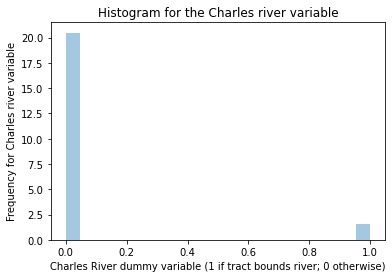

In [56]:
# Display a Histogram for the Charles River dummy variable which is a Dummy Variable.

distplot = sns.distplot(boston_df['CHAS'])
distplot.set(xlabel = "Charles River dummy variable (1 if tract bounds river; 0 otherwise)"
             ,ylabel = "Frequency for Charles river variable"
            , title = "Histogram for the Charles river variable")

EXPLANATION - The Histogram shows the Frequency Distribution for Charles River dummy variable where (1 if tract bounds river; 0 otherwise)

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable.')]

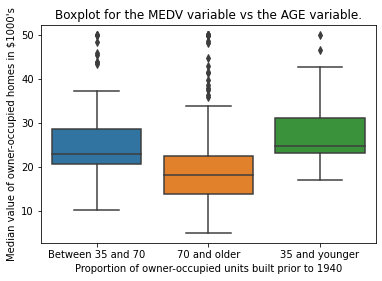

In [102]:
# Discretize the AGE column into three groups for analysis.

boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

EXPLANATION - The Boxplot corresponds to the various groups in the AGE column and there are three groups which are 35 years and younger, Between 35 and 70 years and 70 years and older. The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22.

[Text(0, 0.5, 'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5, 0, 'Proportion of non-retail business acres per town.'),
 Text(0.5, 1.0, 'Scatter Plot between NOX and INDUS')]

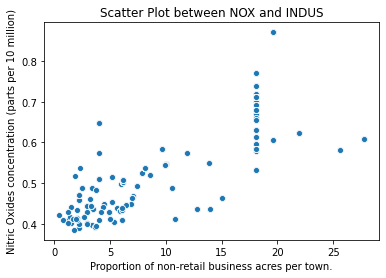

In [60]:
# ScatterPlot for correlation between the INDUS and NOX column.

scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration (parts per 10 million)"
            , xlabel = "Proportion of non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

EXPLANATION - The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.

[Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

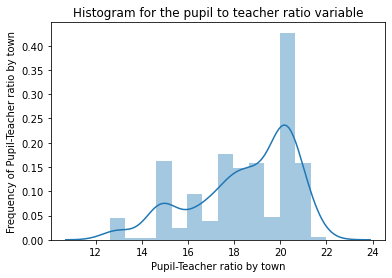

In [61]:
# Display a Histogram for the PTRATIO column.

histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

EXPLANTION - The Histogram mentioned above corresponds to the Frequency Distribution of Pupil-Teacher ratio by town. The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution.

### T-Test: Using the Boston Housing Data We need to check Is there a significant difference in median value of houses bounded by the Charles river or not? 



ASSUMPTIONS - 

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river")
-   $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river")

We can use the Levene's Test in Python to check test significance


In [110]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [113]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

**CONCLUSION:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river

### ANOVA: Using the Boston Housing data set, Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

First, we group the data into categories as the one-way ANOVA can't work with continuous variable.

-   35 years and younger
-   Between 35 and 70 years
-   70 years and older


In [103]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

State the hypothesis

-   $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
-   $H_1:$ At least one of the means differ


Test for equality of variance


In [106]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

First, separate the three samples (one for each category) into a variable each.


In [104]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

Now, run a one-way ANOVA.

In [111]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

**CONCLUSION:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

### Correlation: Using the Boston Housing dataset, Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

State the hypothesis:

-   $H_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
-   $H_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [115]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061239593e-98)

**CONCLUSION:** Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### Regression with T-test: Using the Boston Housing data set, What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

We will state the null hypothesis:

-   $H_0: β1$ = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)
-   $H_1: β1$ is not equal to 0 (There is an impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes)

In [119]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        07:45:39   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres .